In [ ]:
## import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno

from scipy import stats


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier


from sklearn.compose import make_column_transformer

from sklearn.metrics import r2_score,mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import cross_validate



In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
# change the column names to lower case
train.columns=map(str.lower,train.columns)
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape

(1460, 81)

In [ ]:
train.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [ ]:
total_missing=train.isnull().sum().sort_values(ascending=False)
percent=train.isnull().sum().sort_values(ascending=False)/train.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable
missing_df=missing_df[total_missing>0] # only retain those with missing values
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage
missing_df

,total_missing,percentage_missing
variable,,
poolqc,1453,99.520548
miscfeature,1406,96.301370
alley,1369,93.767123
fence,1179,80.753425
masvnrtype,872,59.726027
fireplacequ,690,47.260274
lotfrontage,259,17.739726
garageyrblt,81,5.547945
garagecond,81,5.547945


Explore Categorical Data

In [ ]:
## get their names first
categorical=train.select_dtypes(include=['object'])
categorical.head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
## plot the missingness in the categorical variabele
missing_vars=[x for x in missing_df.index if x in categorical.columns]

In [ ]:
missing_df_resetted=missing_df.reset_index()
missing_df_cat=missing_df_resetted[missing_df_resetted['variable'].isin(categorical.columns)]

Text(0.5, 1.0, 'Missing Values Heatmap')

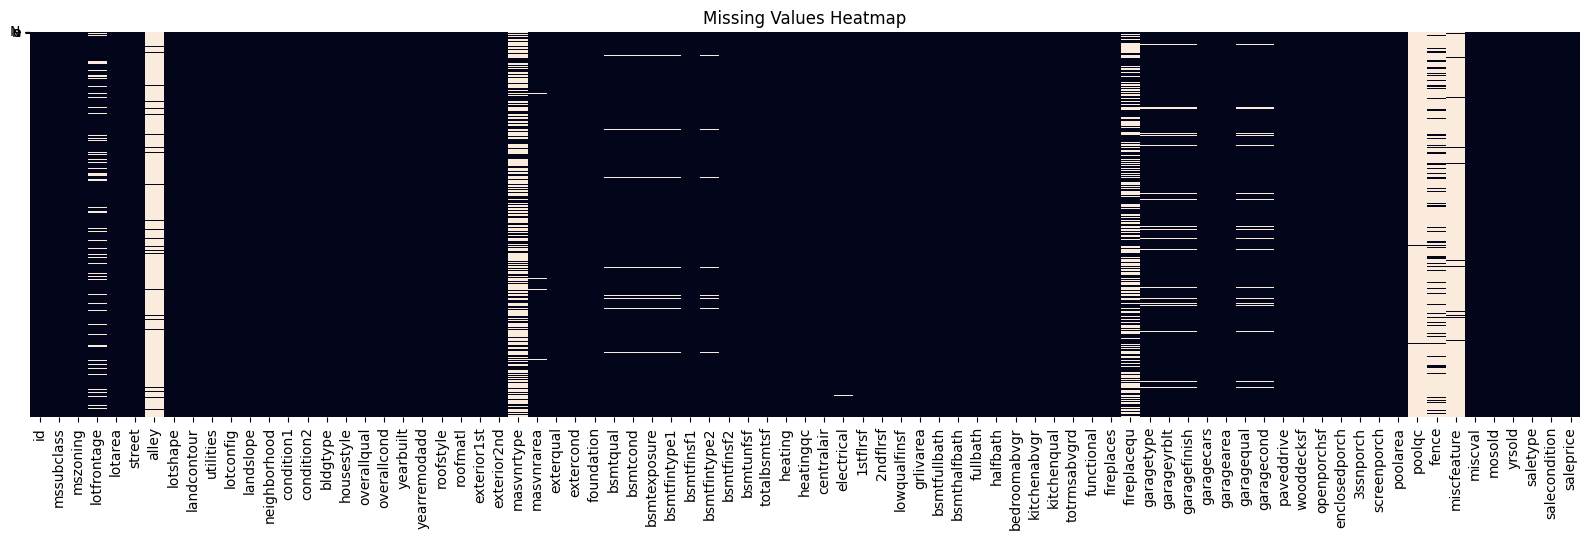

In [ ]:
## plot now missing values heatmap
plt.figure(figsize=(20,5))
sns.heatmap(train.isnull(), yticklabels="None",cbar =False)

plt.title("Missing Values Heatmap")

Text(0.5, 1.0, 'Missing Values Heatmap')

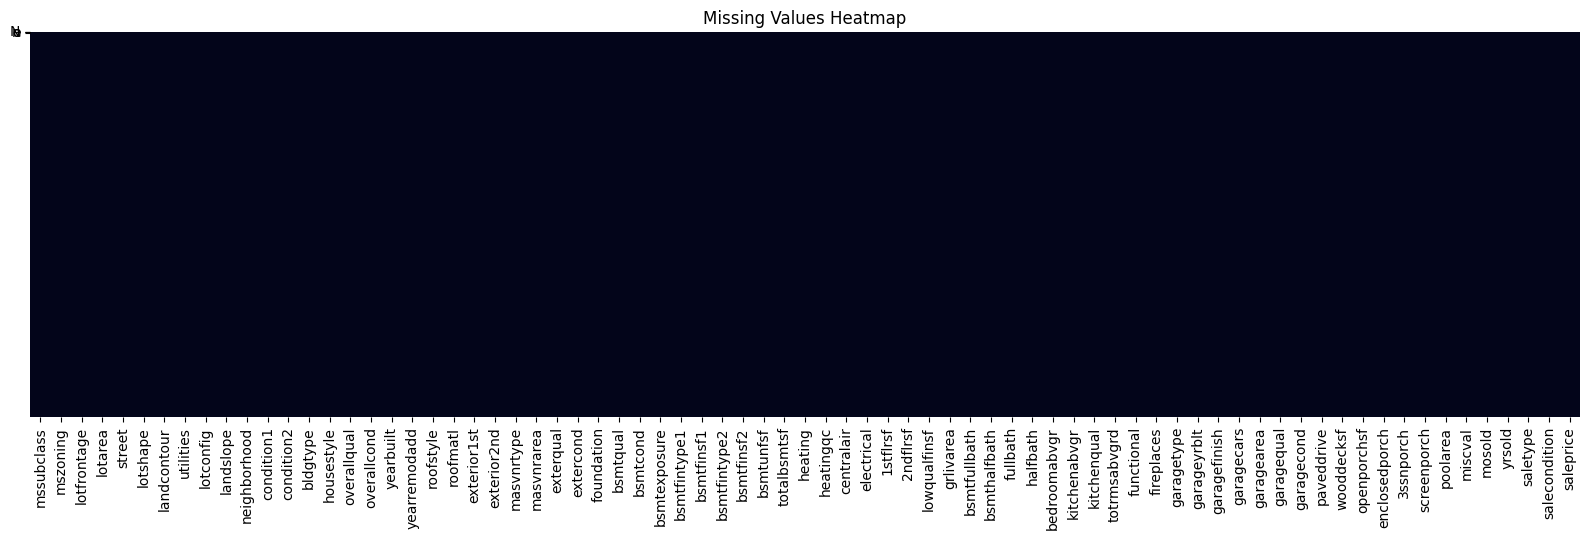

In [ ]:
#drop missing values greater than 50%
train=train.drop(['id','fence',"poolqc",'alley', 'fireplacequ','miscfeature'],axis=1)

#Plot after droppingcolumns

plt.figure(figsize=(20,5))
sns.heatmap(train.isnull(), yticklabels="None",cbar =False)

plt.title("Missing Values Heatmap")

Exploring Numerical Variables

In [ ]:
numerical=train.select_dtypes(include=[np.number])
numerical.columns

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [ ]:
numerical.head(4)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000


In [ ]:
#missing values in numerical variables
missing_df_resetted[missing_df_resetted['variable'].isin(numerical.columns)]

,variable,total_missing,percentage_missing
6,lotfrontage,259,17.739726
7,garageyrblt,81,5.547945
17,masvnrarea,8,0.547945


**handling missing value**s
If a variable is object type we want to impute with 'None'while for numerica type we want to impute with mode

In [ ]:
categorical.fillna('None').head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [ ]:
# for var in numerical.columns:
#     numerical.fillna(numerical[var].mode()[0])
# numerical.isnull().sum()
for var in ['lotfrontage','garageyrblt','masvnrarea']:
    train[var]=train[var].fillna(train[var].mode()[0])

In [ ]:
for var in ['alley','miscfeature','poolqc','fence','fireplacequ','garagecond','garagequal',
            'garagefinish','garagetype','bsmtfintype2','bsmtfintype1','bsmtqual','bsmtcond','bsmtexposure','masvnrtype','electrical']:
    train[var]=train[var].fillna('None')

In [ ]:
train.isnull().sum().sort_values(ascending=False)

id             0
centralair     0
garageyrblt    0
garagetype     0
fireplacequ    0
              ..
masvnrarea     0
masvnrtype     0
exterior2nd    0
exterior1st    0
saleprice      0
Length: 81, dtype: int64

In [ ]:
#Continous Numerical Variables

In [ ]:
temporal_vars=[x for x in train.columns if 'yr' in x or  'year' in x]
temporal_vars

['yearbuilt', 'yearremodadd', 'garageyrblt', 'yrsold']

In [ ]:
numerical.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
discrete=[x for x in numerical.columns if len(train[x].unique())<25] # get all the discrete variables in the dataset
#Discrete data is countable
continous_numerical=[x for x in numerical.columns if x not in temporal_vars+["id"] and x not in discrete]
#Continous datarefers to data that can be measured.
print("there are {} continous variables in this dataset".format(len(continous_numerical)))

there are 16 continous variables in this dataset


In [ ]:
#Encoding Data
cols_transform=make_column_transformer((OrdinalEncoder(),discrete),(OneHotEncoder(),categorical),remainder ="passthrough")

#check

In [ ]:
categorical.head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
train[continous_numerical].head()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,saleprice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


**explore the relationship of these continous variables with selling price**

In [ ]:
train[continous_numerical].corr()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,saleprice
lotfrontage,1.000000,0.281283,0.174146,0.199171,0.034498,0.138852,0.359606,0.404099,0.070626,0.359866,0.317925,0.061329,0.131468,0.014349,0.036907,0.329220
lotarea,0.281283,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843
masvnrarea,0.174146,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.370884,0.159991,0.122528,-0.109907,0.062248,0.472614
bsmtfinsf1,0.199171,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420
bsmtfinsf2,0.034498,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.011378
bsmtunfsf,0.138852,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479
totalbsmtsf,0.359606,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stflrsf,0.404099,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852
2ndflrsf,0.070626,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,0.138347,0.092165,0.208026,0.061989,0.040606,0.319334
grlivarea,0.359866,0.263116,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.468997,0.247433,0.330224,0.009113,0.101510,0.708624


In [ ]:
corr_df=train[continous_numerical].corr()
corr_df.nlargest(5,'saleprice')

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,saleprice
saleprice,0.329220,0.263843,0.472614,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,0.708624,0.623431,0.324413,0.315856,-0.128578,0.111447,1.000000
grlivarea,0.359866,0.263116,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.468997,0.247433,0.330224,0.009113,0.101510,0.708624
garagearea,0.317925,0.180403,0.370884,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,0.468997,1.000000,0.224666,0.241435,-0.121777,0.051412,0.623431
totalbsmtsf,0.359606,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stflrsf,0.404099,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852


In [ ]:
corr_df['saleprice'].sort_values(ascending=False)

saleprice        1.000000
grlivarea        0.708624
garagearea       0.623431
totalbsmtsf      0.613581
1stflrsf         0.605852
masvnrarea       0.472614
bsmtfinsf1       0.386420
lotfrontage      0.329220
wooddecksf       0.324413
2ndflrsf         0.319334
openporchsf      0.315856
lotarea          0.263843
bsmtunfsf        0.214479
screenporch      0.111447
bsmtfinsf2      -0.011378
enclosedporch   -0.128578
Name: saleprice, dtype: float64

<Axes: >

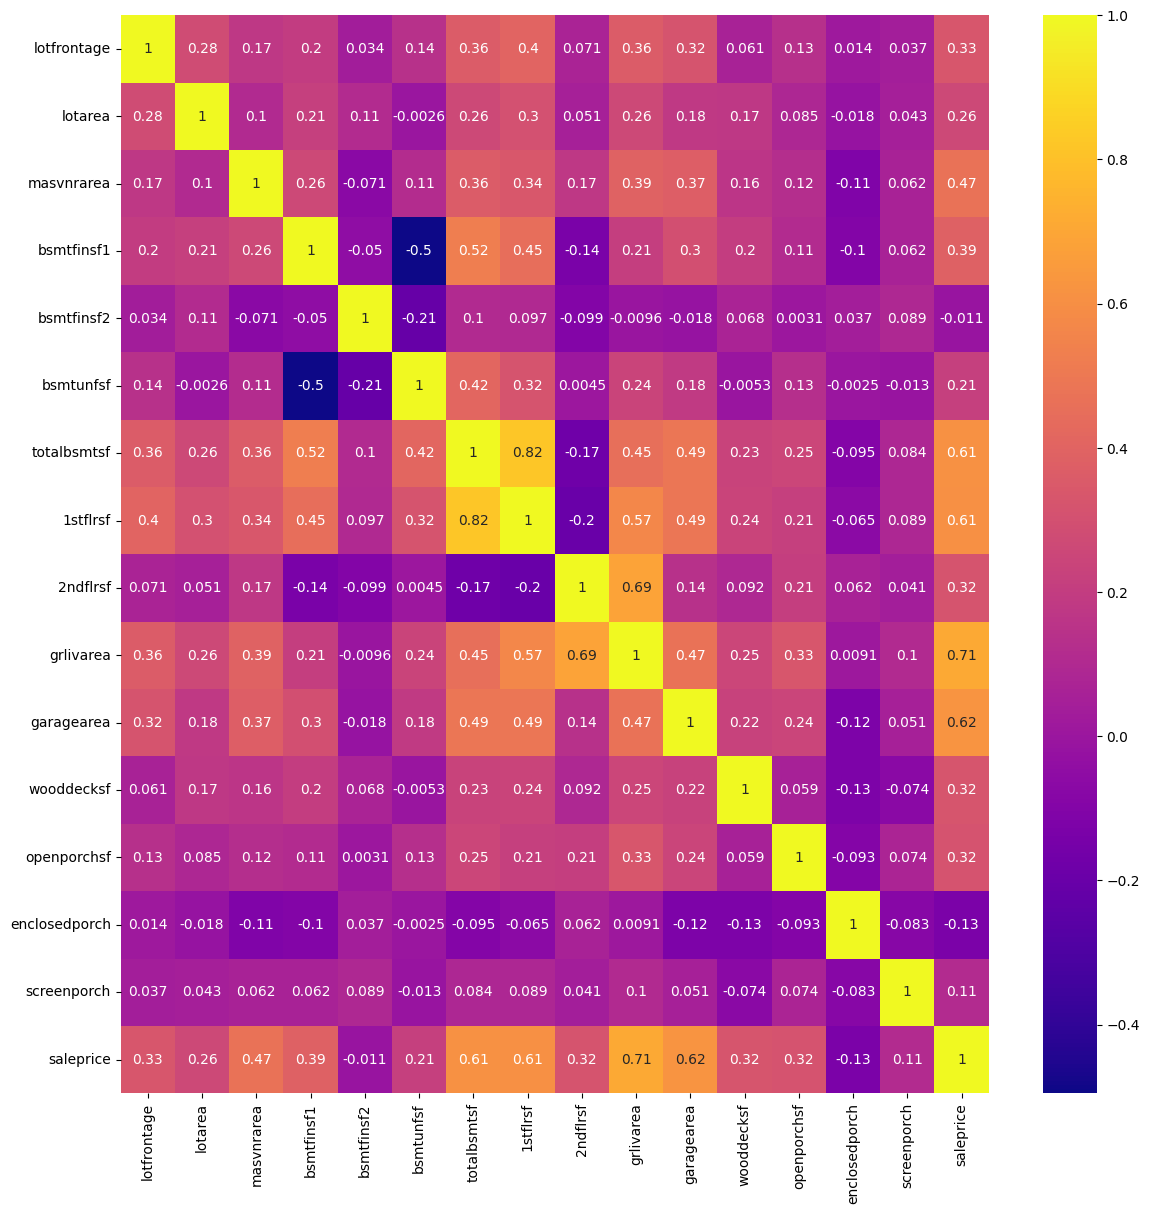

In [ ]:
fig,ax=plt.subplots(figsize=(14,14))
sns.heatmap(corr_df,annot=True,cmap='plasma')

In [ ]:
# those with high correlation with saleprice
#The correlation coefficient ranges from -1 to 1. If the value is close to 1,
#it means that there is a strong positive correlation between the two variables.
#When it is close to -1, the variables have a strong negative correlation.
cols=corr_df.nlargest(10,'saleprice')['saleprice'].index
cols

Index(['saleprice', 'grlivarea', 'garagearea', 'totalbsmtsf', '1stflrsf',
       'masvnrarea', 'bsmtfinsf1', 'lotfrontage', 'wooddecksf', '2ndflrsf'],
      dtype='object')

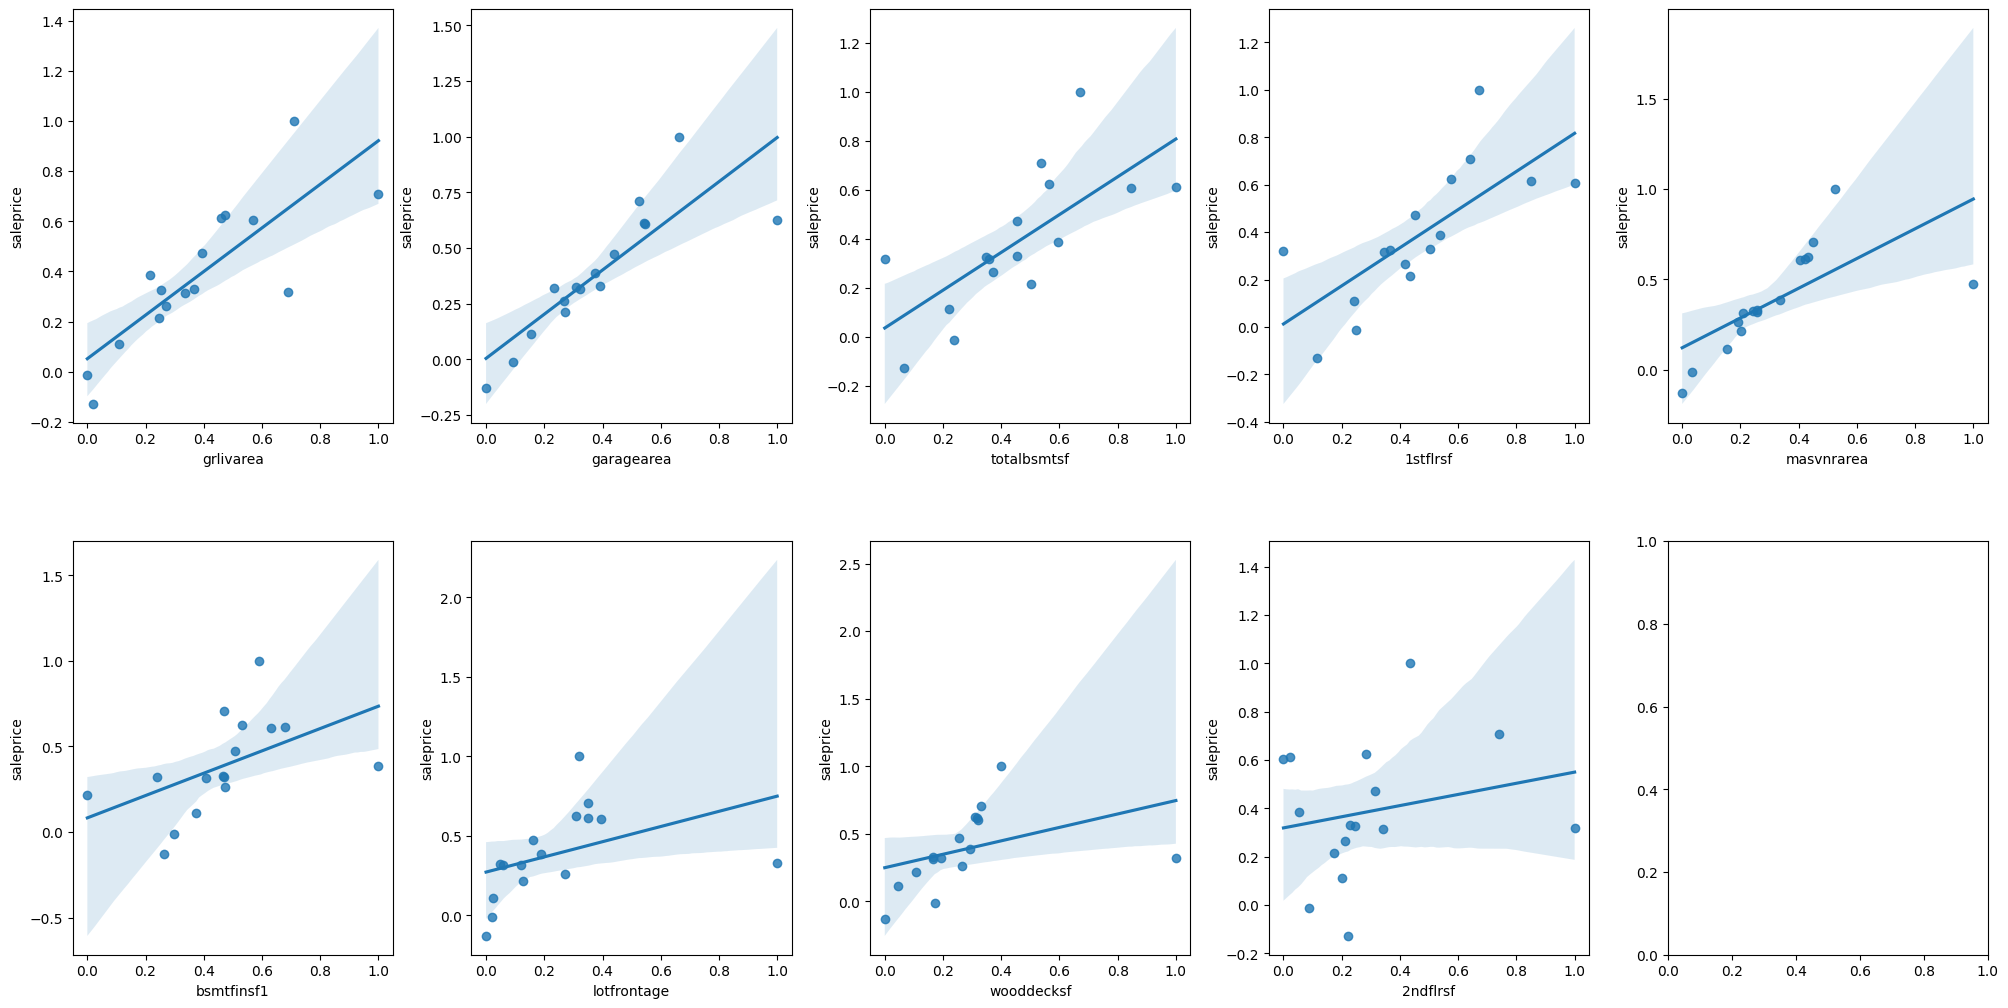

In [ ]:
#these colums are highly correlates 'saleprice', 'grlivarea', 'garagearea', 'totalbsmtsf', '1stflrsf',
      # 'masvnrarea', 'bsmtfinsf1', 'lotfrontage', 'wooddecksf', '2ndflrsf'
#we shall plot them against the sale price
from sklearn import preprocessing
# Let's scale the columns before plotting them against Saleprice
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['grlivarea', 'garagearea', 'totalbsmtsf', '1stflrsf',
       'masvnrarea', 'bsmtfinsf1', 'lotfrontage', 'wooddecksf', '2ndflrsf']
x = corr_df.loc[:,column_sels]
y = corr_df['saleprice']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [ ]:
#remove skewness by by log transformation
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [ ]:
#Ridge Regression
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.12 (+/- 0.22)
MSE: -0.01 (+/- 0.02)


In [ ]:
#  polynomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.01 (+/- 0.01)


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.01 (+/- 0.02)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
#grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.02 (+/- 0.02)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.03 (+/- 0.04)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.02 (+/- 0.02)


Let's plot k-fold results to see which model has better distribution of results. Let's have a look at the MSE distribution of these models with k-fold=10

<Axes: >

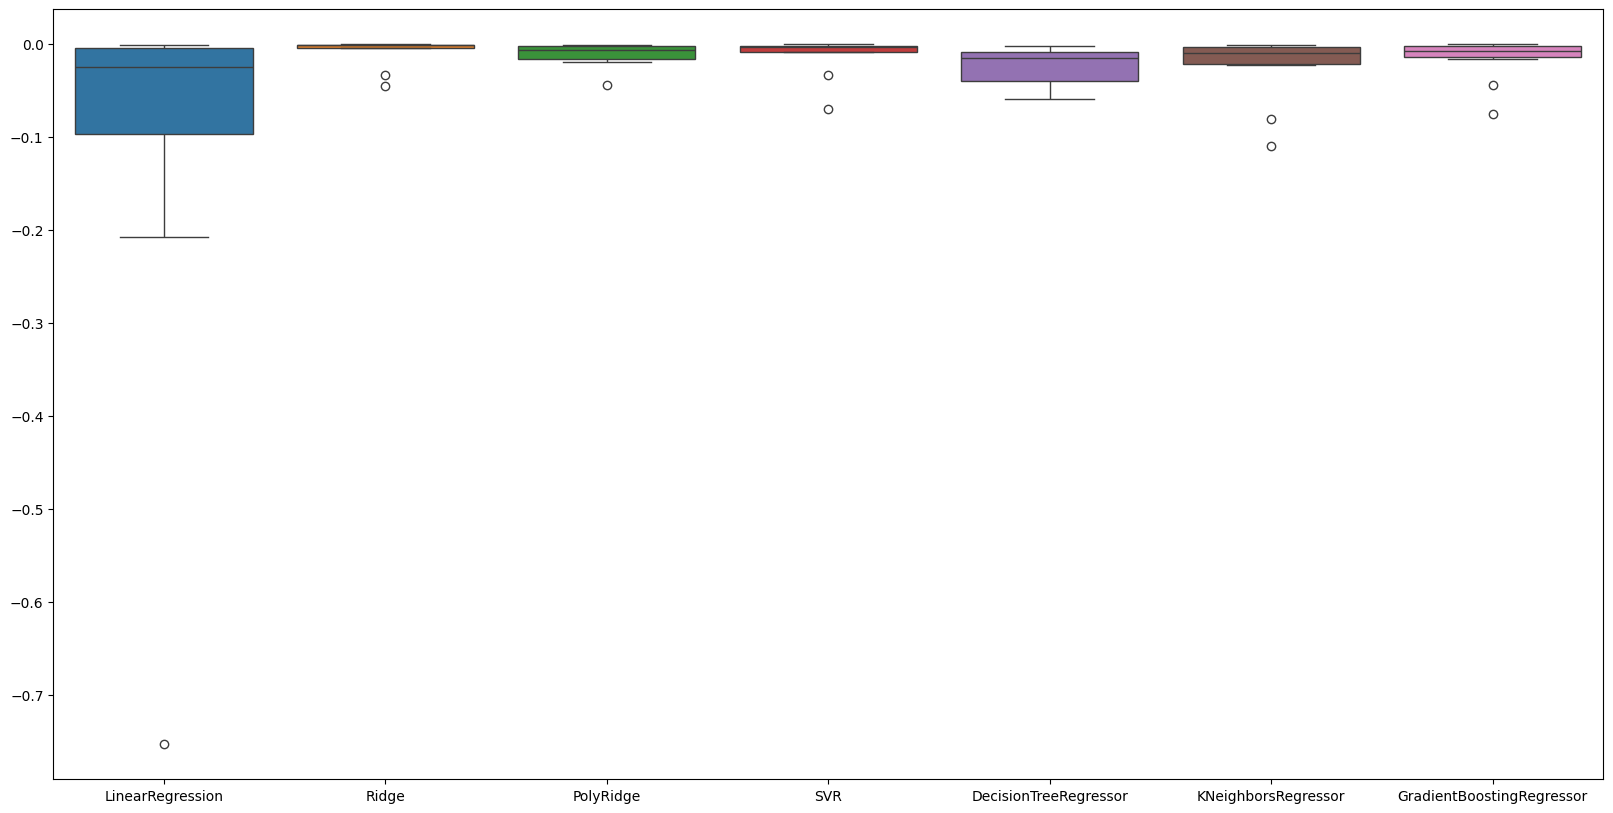

In [ ]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

<Axes: >

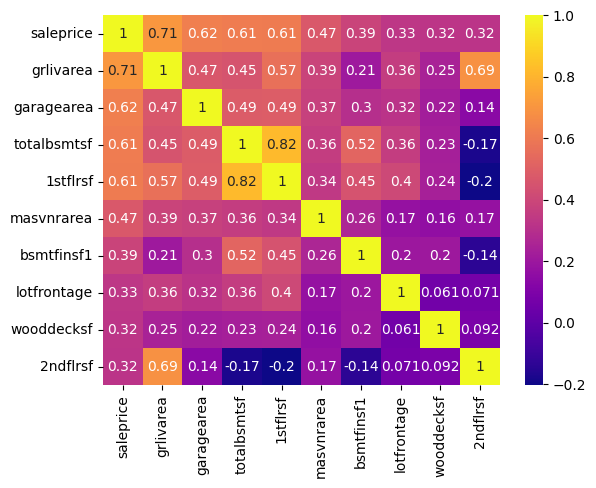

In [ ]:
corrmap=np.corrcoef(train[cols].values.T)
sns.heatmap(corrmap,annot=True,xticklabels=cols.values,yticklabels=cols.values,cmap='plasma')

**explore the relationship between the discrete variables and selling price**

In [ ]:
train['mssubclass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [ ]:
train[discrete].head()

,mssubclass,overallqual,overallcond,lowqualfinsf,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,3ssnporch,poolarea,miscval,mosold,yrsold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


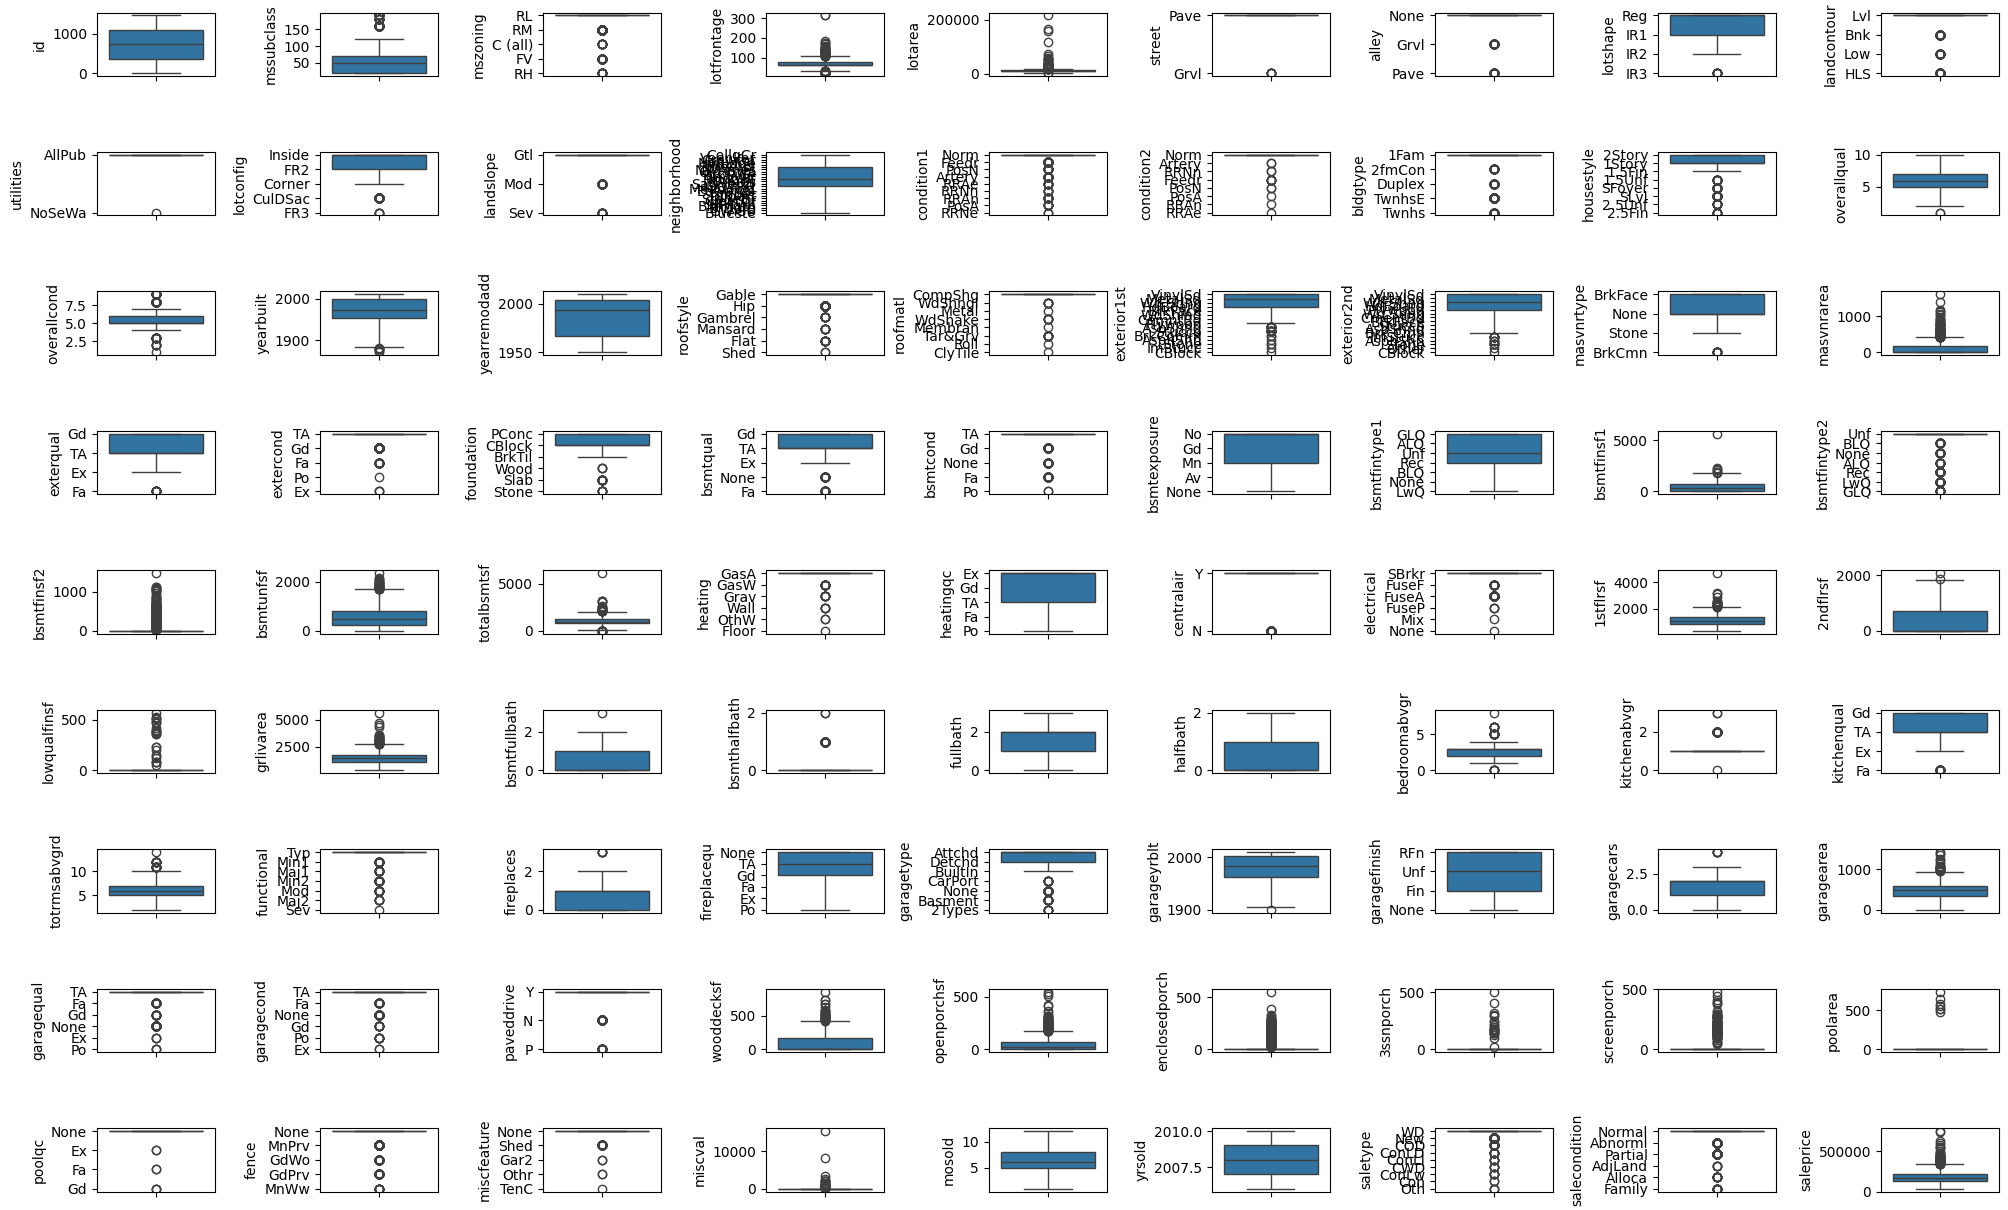

In [ ]:
#check for outliers
fig, axs = plt.subplots(ncols=9, nrows=9, figsize=(20, 12))
index = 0
axs = axs.flatten()
for k,v in train.items():

    sns.boxplot(y=k, data=train, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#check percentage of outliers
for k, v in corr_df.items():
        #train = train.apply(pd.to_numeric, errors='ignore')
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(train)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column lotfrontage outliers = 0.07%
Column lotarea outliers = 0.07%
Column masvnrarea outliers = 0.07%
Column bsmtfinsf1 outliers = 0.14%
Column bsmtfinsf2 outliers = 0.14%
Column bsmtunfsf outliers = 0.14%
Column totalbsmtsf outliers = 0.07%
Column 1stflrsf outliers = 0.07%
Column 2ndflrsf outliers = 0.14%
Column grlivarea outliers = 0.07%
Column garagearea outliers = 0.07%
Column wooddecksf outliers = 0.07%
Column openporchsf outliers = 0.07%
Column enclosedporch outliers = 0.07%
Column screenporch outliers = 0.21%
Column saleprice outliers = 0.00%


In [ ]:
#remove the sale price
corr_df = corr_df[~(corr_df['saleprice'] >= 50.0)]
print(np.shape(corr_df))

(16, 16)
